# PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress = True)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')

Y = df.loc[:,'0']
X = df.drop(['0'], axis=1)

print(df.shape)

df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,248,253,253,43,20,20,20,20,5,0,5,20,20,37,150,150,150,147,10,0,0,0,0,0,0,0,0,0,248,253,253,253,253,253,253,253,168,143,166,253,253,253,253,253,253,253,123,0,0,0,0,0,0,0,0,0,174,253,253,253,253,253,253,253,253,253,253,253,249,247,247,169,117,117,57,0,0,0,0,0,0,0,0,0,0,118,123,123,123,166,253,253,253,155,123,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,252,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,244,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,254,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,228,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,251,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,254,205,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,215,254,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,198,176,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Initialize the PCA() class and call the fit_transform() on X to simultaneously campute the weight of PCs and then transform X to produce the new set of PCs of X

In [4]:
pca= PCA()
df_pca = pca.fit_transform(X=X)

In [5]:
type(df_pca)

numpy.ndarray

In [6]:
df_pca

array([[ -134.2724107 ,   107.74010173,  -544.92340908, ...,
           -0.        ,    -0.        ,    -0.        ],
       [ -970.41512047,  -371.81582238,   114.48075411, ...,
            0.        ,    -0.        ,     0.        ],
       [ 1267.52970321,  -263.23020735,   -35.6869334 , ...,
            0.        ,    -0.        ,     0.        ],
       ...,
       [ 1467.86804663,  -268.85955188,   635.24089102, ...,
           -0.        ,     0.        ,     0.        ],
       [-1070.02927943,  -119.69307828,   180.78825703, ...,
            0.        ,     0.        ,    -0.        ],
       [  117.6542393 ,  1291.79042742,  -753.06136794, ...,
            0.        ,     0.        ,    -0.        ]])

In [8]:
df_pca.shape

(3147, 784)

In [9]:
df_pca = pd.DataFrame(df_pca)
df_pca.round(2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,491.66,26.38,475.06,-586.81,-212.62,130.30,-142.28,135.03,33.64,-9.19,-82.92,-162.51,139.57,-87.99,76.97,21.82,208.86,-28.25,-280.18,-128.39,-165.00,-149.95,-162.30,-89.39,124.01,281.61,96.67,-102.44,-133.79,-7.60,119.26,-25.08,15.52,-174.93,153.99,16.98,11.85,129.30,-14.18,130.51,170.69,45.36,-91.76,-225.60,-10.28,-21.01,134.32,-31.34,91.50,-97.61,56.10,-46.42,-80.78,-149.49,-84.85,186.82,-31.06,36.32,-100.05,-22.07,-70.27,-94.31,-1.80,-6.00,-16.89,25.20,28.99,16.84,-95.25,1.15,57.27,3.04,111.24,76.47,29.08,75.36,-21.68,-39.90,-10.37,-53.74,-92.11,-16.60,-89.18,42.78,38.66,14.42,-71.91,-37.66,-66.61,15.07,109.00,20.93,1.18,-11.74,-44.00,0.42,-3.89,-86.59,-34.10,53.78,11.05,2.54,6.93,20.61,-26.47,-45.57,39.03,-32.92,-24.95,-11.43,9.84,-121.58,-85.72,-4.34,27.30,-33.65,-6.02,55.73,-16.54,-88.85,65.16,6.79,-28.36,83.96,3.64,42.36,-41.26,-14.33,-60.87,41.47,-21.57,22.31,17.74,-39.12,73.35,52.74,-26.70,19.30,69.97,18.67,-44.62,-17.22,-44.74,83.49,13.46,29.02,46.37,-9.88,22.12,-68.60,2.36,-9.93,47.68,35.38,14.88,2.68,10.23,16.05,-19.36,39.47,-20.69,3.40,15.03,61.50,-15.45,-36.60,78.00,5.75,-8.78,-10.53,2.26,-30.46,8.98,-27.61,26.29,11.27,46.30,-38.94,-18.27,9.74,-8.61,-22.06,-7.27,-18.08,18.68,-3.05,-11.94,-42.67,40.13,-24.26,-6.23,13.14,-26.45,-3.33,-52.66,30.70,-19.22,19.74,-59.81,14.53,10.17,61.87,61.90,-4.27,29.68,-48.85,-41.14,-2.33,-10.93,2.78,13.00,11.83,-35.17,37.06,4.02,-12.84,19.66,6.34,91.56,68.09,-20.34,21.09,-40.90,-65.29,-14.42,-1.61,35.94,54.49,20.19,0.73,-15.27,-0.03,-24.55,36.10,27.76,17.27,-16.36,-9.94,7.00,48.41,...,0.17,0.27,0.29,-0.15,-0.29,0.02,0.84,-0.20,0.17,-0.50,-0.05,-0.05,-0.08,0.03,0.01,0.01,0.06,-0.0,0.0,0.02,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0

1. Each principal component is the dot product of its weights (in pca.components_) and the mean centered data(X)
2. Mean centered is each column of the 'X' is subtracted from its own mean so that mean of each column becomes zero.

In [11]:
#Weight of principal component
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-1.789862e-19,1.387779e-17,-2.220446e-16,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000003,-0.000020,-0.000014,-0.000020,-0.000012,-0.0,-0.0,-0.0,-0.0,-0.000004,-0.000006,-0.000003,-1.713529e-07,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000067,-0.000137,-0.000113,-0.000067,-0.000030,-0.000116,-0.000203,-0.000257,-0.000068,-0.000056,0.000084,0.000083,-0.000023,-5.052015e-05,0.000017,0.000024,0.000008,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000041,-0.000204,-0.000376,-0.000586,-0.000812,-0.000954,-0.001006,-0.000769,0.000355,0.001899,0.002954,0.003753,0.003076,0.002355,0.001344,0.000638,0.000306,0.000323,0.000160,0.000035,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.300415e-05,0.000041,-0.000033,-0.000288,-0.000894,-0.001166,-0.000567,0.001086,0.002939,0.006420,0.009710,0.010543,0.015770,0.018512,0.015585,0.012526,0.009144,0.004377,0.001887,0.000526,0.000349,0.000103,7.458552e-07,-0.0,-0.0,-0.0,-0.0,-0.0,0.000006,0.000025,-0.000121,-0.000515,-0.001114,-0.001387,0.001821,0.008155,0.016909,0.025818,0.029655,0.028803,0.028396,0.032784,0.035357,0.035146,0.027718,0.018911,0.009448,0.004037,0.001126,0.000409,0.000102,-0.0,-0.0,-0.0,-0.0,-0.0,7.578415e-07,-0.000085,-0.000330,-0.000659,-0.000106,0.002869,0.011087,0.023852,0.039554,0.050827,0.050691,0.042396,0.035919,0.037363,0.044536,0.052480,0.051069,0.041651,0.026247,0.012314,0.003423,0.000855,0.000146,-0.0,-0.0,-0.0,-0.0,-0.0,0.000036,-0.000200,-0.000320,0.000112,0.002960,0.010497,0.024536,0.043352,0.062395,0.068632,0.059171,0.039951,0.025122,0.025113,0.037252,0.056250,0.067656,0.063726,0.047216,0.024991,0.008105,0.001237,0.000049,-0.0,-0.0,-0.0,-0.0,-0.0,0.000029,0.000248,0.000374,0.001530,0.009073,0.021827,0.040484,0.063038,0.078180,0.078016,0.056667,0.021836,-0

In [12]:
#Mean Computation
X_mean = X - X.mean()
X_mean.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,0.0,0.0,-0.034954,-0.053702,-0.015888,-0.000636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.117572,-0.25421,-0.19606,-0.173181,-0.360979,-0.879568,-1.346679,-1.674611,-1.550048,-1.456308,-1.339689,-1.172545,-0.553861,-0.297744,-0.224658,-0.131554,-0.020337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.061646,-0.440737,-1.047029,-2.095329,-3.954878,109.044805,115.193835,158.086114,239.774071,239.025421,134.519542,80.118843,-10.028916,-6.854782,-4.019066,-1.911662,-0.545281,-0.379409,-0.159517,-0.036861,0.0,0.0,0.0,0.0,0.0,0.0,-0.017795,-0.023197,-0.187162,-1.671433,-4.080394,-7.781061,154.673975,229.807118,218.8551,205.421036,190.773753,177.050524,172.531935,143.30537,-32.341277,-45.741023,-30.305688,-17.427709,-8.24436,-3.363521,-1.044487,-0.283127,-0.004449,0.0,0.0,0.0,0.0,0.0,-0.021608,-0.106768,-0.698761,-3.821099,-8.653003,152.974897,225.944391,211.210041,192.441055,130.048935,34.497299,47.702256,115.519542,120.224976,3.15761,-94.077534,-66.567842,-40.895138,-19.974579,-8.714331,-2.362568,-0.486495,-0.103273,0.0,0.0,0.0,0.0,0.0,-0.064824,-0.721322,-2.072132,-6.504608,38.298697,226.360661,215.040356,154.275183,-45.353352,-88.132825,-124.031141,-140.183985,49.64061,99.280902,-3.351446,-122.743248,-92.345726,-61.303146,-33.001271,-14.597394,-3.966317,-0.738163,-0.155386,0.0,0.0,0.0,0.0,0.0,-0.127423,-1.191293,-3.841436,-8.995551,59.543375,221.517,164.747061,-38.353352,-82.591992,-98.814109,-117.996187,-15.558945,99.790594,104.961233,-77.00286,-128.742294,-105.500794,-73.74293,-45.122021,-21.734668,-6.938354,-1.011439,-0.104226,0.0,0.0,0.0,0.0,0.0,-0.298697,-1.647919,-4.240864,-9.435653,-19.3238,-2.621544,-31.535748,-66.619002,-79.525898,-90.232602,-104.804576,86.86368,121.530982,121.613918,-64.642517,-121.334287,-106.549094,-81.308548,-53.358754,-29.881157,-11.337782,-2.044487,-0.095964,...,-0.143311,-2.636161,-15.320305,-41.015253,-68.332698,-90.435971,144.

In [14]:
np.dot(df_pca_loadings.loc[0,:], X_mean.loc[0,:])

-134.27241070066754

## Percentage of Variance explained with each PC

In [24]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]


In [25]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)

In [26]:
variance_exp_cumsum

array([0.22, 0.32, 0.38, 0.44, 0.48, 0.52, 0.55, 0.58, 0.6 , 0.62, 0.64,
       0.65, 0.66, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.76, 0.77, 0.78, 0.78, 0.79, 0.79, 0.8 , 0.81, 0.81, 0.81, 0.82,
       0.82, 0.83, 0.83, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86,
       0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
       0.9 , 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92,
       0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96,
       0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
       0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.

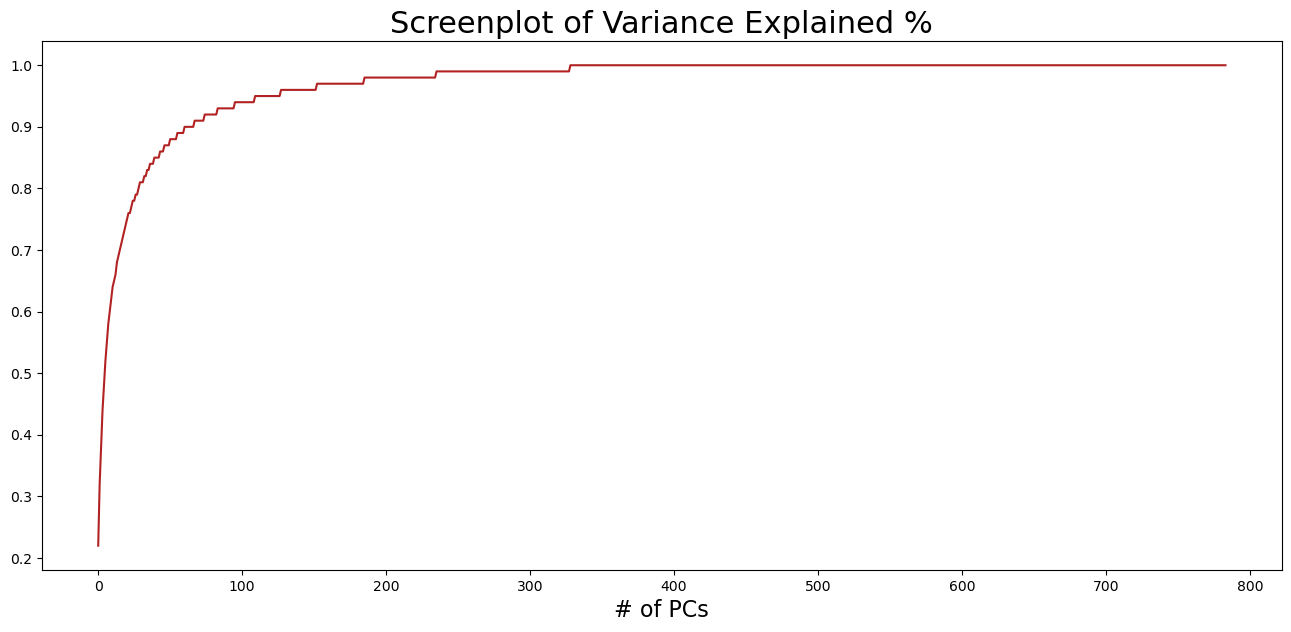

In [27]:
fig, axes = plt.subplots(1,1,figsize = (16,7), dpi =100)
plt.plot(variance_exp_cumsum, color = 'firebrick')
plt.title('Screenplot of Variance Explained %', fontsize = 22)
plt.xlabel('# of PCs', fontsize = 16)
plt.show()

In [32]:
from scipy.spatial import ConvexHull
def encircle(x,y, ax = None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

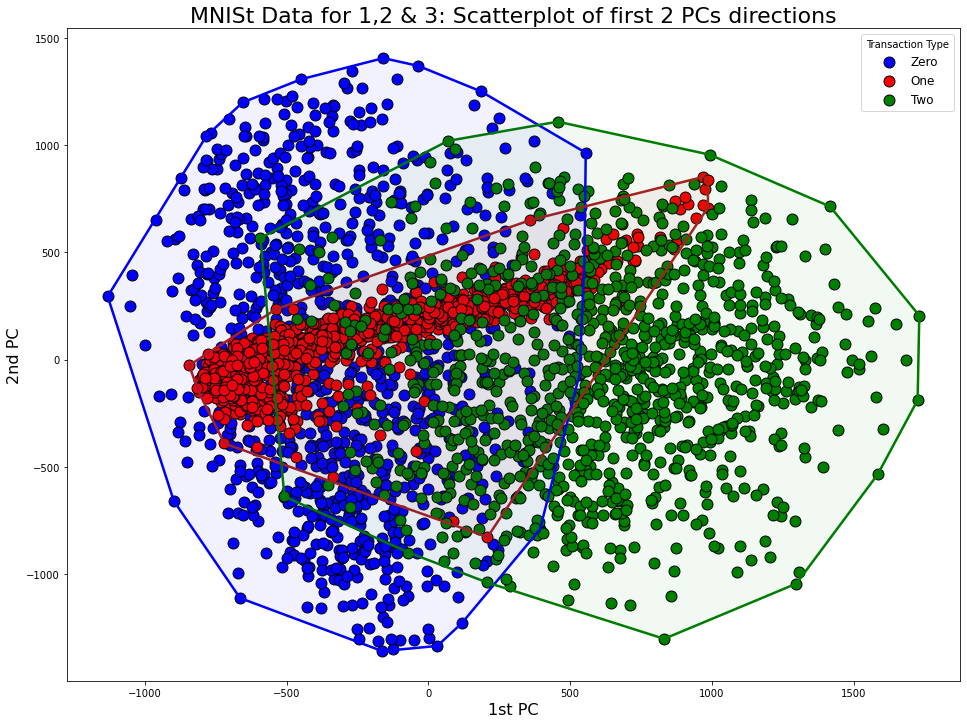

In [38]:
fig, ax = plt.subplots(1,1,figsize=(16,12))
row_0 = Y ==0;
row_1 = Y ==1;
row_2 = Y ==2;

#PLOT
ax.scatter(df_pca.loc[row_0.tolist(),1], df_pca.loc[row_0.tolist(),2], c= 'blue', edgecolor ='k', s= 120, label = 'Zero')
ax.scatter(df_pca.loc[row_1.tolist(),1], df_pca.loc[row_1.tolist(),2], c= 'red', edgecolor ='k', s= 120, label = 'One')
ax.scatter(df_pca.loc[row_2.tolist(),1], df_pca.loc[row_2.tolist(),2], c= 'green', edgecolor ='k', s= 120, label = 'Two')

# Encircle the boundaries
encircle(df_pca.loc[row_0.tolist(),1], df_pca.loc[row_0.tolist(),2], ec= 'blue', fc ='none', linewidth = 2.5)
encircle(df_pca.loc[row_1.tolist(),1], df_pca.loc[row_1.tolist(),2], ec= 'firebrick', fc ='none', linewidth = 2.5)
encircle(df_pca.loc[row_2.tolist(),1], df_pca.loc[row_2.tolist(),2], ec= 'green', fc ='none', linewidth = 2.5)


# Shading
encircle(df_pca.loc[row_0.tolist(),1], df_pca.loc[row_0.tolist(),2], fc= 'blue', ec ='k', alpha = 0.05)
encircle(df_pca.loc[row_1.tolist(),1], df_pca.loc[row_1.tolist(),2], fc= 'firebrick', ec ='k', alpha = 0.05)
encircle(df_pca.loc[row_2.tolist(),1], df_pca.loc[row_2.tolist(),2], fc= 'green', ec ='k', alpha = 0.05)


#labels

ax.set_title("MNISt Data for 1,2 & 3: Scatterplot of first 2 PCs directions",  fontsize = 22)
ax.set_xlabel("1st PC", fontsize =16)
ax.set_ylabel("2nd PC", fontsize =16)
ax.legend(loc='best', title = 'Transaction Type', fontsize = 12)
plt.show()




In [39]:
df_orig = pca.inverse_transform(df_pca)
pd.DataFrame(df_orig).round().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,116.0,125.0,171.0,255.0,255.0,150.0,93.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,169.0,253.0,253.0,253.0,253.0,253.0,253.0,218.0,30.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,169.0,253.0,253.0,253.0,213.0,142.0,176.0,253.0,253.0,122.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,52.0,250.0,253.0,210.0,32.0,12.0,-0.0,6.0,206.0,253.0,140.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,77.0,251.0,210.0,25.0,-0.0,-0.0,-0.0,122.0,248.0,253.0,65.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,31.0,18.0,-0.0,-0.0,-0.0,-0.0,209.0,253.0,253.0,65.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,248.0,253.0,253.0,43.0,20.0,20.0,20.0,20.0,5.0,-0.0,5.0,20.0,20.0,37.0,150.0,150.0,150.0,147.0,10.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,248.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,168.0,143.0,166.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,123.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,174.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,249.0,247.0,247.0,169.0,117.0,117.0,57.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,118.0,123.0,123.0,123.0,166.0,253.0,253.0,253.0,155.0,123.0,123.0,41.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.

# PCA from Scratch

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')
Y = df.loc[:,'0']
X =df.drop(['0'], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,248,253,253,43,20,20,20,20,5,0,5,20,20,37,150,150,150,147,10,0,0,0,0,0,0,0,0,0,248,253,253,253,253,253,253,253,168,143,166,253,253,253,253,253,253,253,123,0,0,0,0,0,0,0,0,0,174,253,253,253,253,253,253,253,253,253,253,253,249,247,247,169,117,117,57,0,0,0,0,0,0,0,0,0,0,118,123,123,123,166,253,253,253,155,123,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,252,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,244,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,254,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,228,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,251,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,254,205,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,215,254,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,198,176,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
X_standard = X - X.mean()

In [42]:
df_cov = X_standard.cov()
print(df.shape)

(3147, 785)


In [43]:
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues[:10])

[764074.70509694+0.j 333409.88084323+0.j 206248.30545139+0.j
 190073.11430869+0.j 149373.67054257+0.j 140893.79592355+0.j
 103478.87643359+0.j  87549.48702637+0.j  82347.51266608+0.j
  66776.33611636+0.j]


In [44]:
print(eigvectors.shape)

(784, 784)


In [45]:
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca)
df_pca_calc.round(2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,134.272411+0.000000j,-107.740102+0.000000j,544.923409+0.000000j,-313.075995+0.000000j,-500.134982+0.000000j,163.354256+0.000000j,-223.046212+0.000000j,460.862253+0.000000j,-1016.398109+0.000000j,-206.766560+0.000000j,-491.662638+0.000000j,-26.376007+0.000000j,-475.057622+0.000000j,-586.809863+0.000000j,-212.622212+0.000000j,-130.297889+0.000000j,142.278444+0.000000j,135.029931+0.000000j,33.643003+0.000000j,-9.194938+0.000000j,82.922710+0.000000j,162.514914+0.000000j,-139.570371+0.000000j,87.986462+0.000000j,-76.970878+0.000000j,-21.824123+0.000000j,-208.855559+0.000000j,28.252003+0.000000j,280.181207+0.000000j,-128.385314+0.000000j,-165.000657+0.000000j,-149.950567+0.000000j,162.304944+0.000000j,89.392726+0.000000j,124.013490+0.000000j,281.610563+0.000000j,-96.673928+0.000000j,102.441490+0.000000j,-133.785199+0.000000j,7.601007+0.000000j,-119.262892+0.000000j,25.084991+0.000000j,-15.524476+0.000000j,-174.925128+0.000000j,153.987478+0.000000j,16.975356+0.000000j,11.854885+0.000000j,129.301500+0.000000j,-14.182657+0.000000j,-130.514466+0.000000j,-170.692848+0.000000j,45.355920+0.000000j,-91.761286+0.000000j,-225.600260+0.000000j,10.276642+0.000000j,-21.005379+0.000000j,134.318910+0.000000j,31.339100+0.000000j,91.497754+0.000000j,-97.612623+0.000000j,-56.103171+0.000000j,-46.415488+0.000000j,-80.781578+0.000000j,149.494929+0.000000j,84.852622+0.000000j,186.821175+0.000000j,31.059882+0.000000j,36.318123+0.000000j,-100.052076+0.000000j,22.068623+0.000000j,70.272058+0.000000j,-94.313972+0.000000j,1.797226+0.000000j,25.200939+0.000000j,-16.887747+0.000000j,6.002523+0.000000j,-28.991176+0.000000j,16.838381+0.000000j,95.246461+0.000000j,1.148013+0.000000j,57.267769+0.000000j,-3.042894+0.000000j,-111.242483+0.000000j,76.469500+0.000000j,-29.081903+0.000000j,75.361872+0.000000j,-21.684623+0.000000j,39.903918+0.000000j,10.374462+0.000000j,-53.743391+0.000000j,-92.105157+0.000000j,-16.602123+0.000000j,89.182370+0.000000j,42.778904+0.000000j,38.661497+0.000000j,14.421625+0.000000j,-71.908680+0.000000j,37.655167+0.000000j,-66.608699+0.000000j,-15.069401+0.000000j,-108.999988+0.0000